# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [11]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***

Dane jest $m = 50$ oraz $n = 12$. 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [12]:
#1.1
def spare_matrix_Abt(m: int,n: int):
    if isinstance(m,int) and isinstance(n,int) and m > 0 and n > 0:
        t = np.linspace(0,1,m)
        b = np.cos(4*t)
        A = np.fliplr(np.vander(t,n))
        return A,b
    else:
        return None
time = []
residuum = []
memory = []
m = 50
n = 12
A,b= spare_matrix_Abt(m,n)
A_left,A_right = main.square_from_rectan(A,b)
result = np.linalg.solve(A_left,A_right)
print("Wynik przy użyciu funkcji solve \n")
print(result,'\n')
print("Norma residuum wynosi ", main.residual_norm(A_left,result,A_right))
print()
residuum.append(main.residual_norm(A_left,result,A_right))
time_solve = %timeit -r 5 -n 10 -o np.linalg.solve(A_left,A_right)
time.append(time_solve.average)
memory_solve = %memit -o np.linalg.solve(A_left,A_right)
memory.append(memory_solve.mem_usage)

Wynik przy użyciu funkcji solve 

[ 1.00000002e+00 -4.53838511e-06 -7.99982835e+00 -2.55470836e-03
  1.06864521e+01 -9.02946028e-02 -5.43102802e+00 -4.69803109e-01
  2.15855279e+00 -3.35492501e-01 -2.32067677e-01  6.24249477e-02] 

Norma residuum wynosi  4.33618492178814e-14

7.87 µs ± 1.69 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 178.20 MiB, increment: 0.00 MiB


In [13]:
#1.2 za pomocą lstsq
result_lstsq = sp.linalg.lstsq(A,b)
print("Wynik przy użyciu funkcji lstsq \n")
print(result_lstsq[0],'\n')
print("Norma residuum wynosi ", main.residual_norm(A,result_lstsq[0],b))
print()
residuum.append(main.residual_norm(A,result_lstsq[0],b))
time_lstsq = %timeit -r 5 -n 10 -o sp.linalg.lstsq(A,b)
time.append(time_lstsq.average)
memory_lstsq = %memit -o sp.linalg.lstsq(A,b)
memory.append(memory_lstsq.mem_usage)

Wynik przy użyciu funkcji lstsq 

[ 1.00000000e+00 -4.22743379e-07 -7.99998124e+00 -3.18763320e-04
  1.06694308e+01 -1.38202900e-02 -5.64707562e+00 -7.53160325e-02
  1.69360697e+00  6.03210270e-03 -3.74241701e-01  8.80405757e-02] 

Norma residuum wynosi  7.999154114922235e-09

176 µs ± 67.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 178.20 MiB, increment: 0.00 MiB


In [14]:
#1.3
Q, R = np.linalg.qr(A)
result_QR = sp.linalg.solve_triangular(R,np.transpose(Q) @ b)
print("Wynik przy użyciu funkcji QR \n")
print(result_QR,'\n')
residuum_QR = main.residual_norm(R, result_QR, np.transpose(Q) @ b)
print("Norma residuum dla rozkładu QR wynpso: ",residuum_QR)
residuum.append(residuum_QR)
time_QR1 = %timeit -r 5 -n 10 -o np.linalg.qr(A)
time_QR2 = %timeit -r 5 -n 10 -o sp.linalg.solve_triangular(R,np.transpose(Q) @ b)
time_QR = time_QR1.average + time_QR2.average
memory_QR = %memit -o sp.linalg.solve_triangular(R,np.transpose(Q) @ b)
time.append(time_QR)
memory.append(memory_QR.mem_usage)

Wynik przy użyciu funkcji QR 

[ 1.00000000e+00 -4.22743364e-07 -7.99998124e+00 -3.18763317e-04
  1.06694308e+01 -1.38202900e-02 -5.64707562e+00 -7.53160328e-02
  1.69360697e+00  6.03210233e-03 -3.74241701e-01  8.80405756e-02] 

Norma residuum dla rozkładu QR wynpso:  3.671410282288433e-15
81.6 µs ± 36.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
36.2 µs ± 5.81 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 178.20 MiB, increment: 0.00 MiB


In [15]:
# 1.4
U,S,V = np.linalg.svd(A,full_matrices=False)
S = np.diag(S)
result_SVD = np.transpose(V) @ np.linalg.solve(S,np.transpose(U) @ b)
print(result_SVD)
print('Norma residuum wynosi: ',main.residual_norm(A,result_SVD,b))
residuum.append(main.residual_norm(A,result_SVD,b))
time_SVD1 = %timeit -r 5 -n 10 -o np.linalg.svd(A,full_matrices=False)
time_SVD2 = %timeit -r 5 -n 10 -o np.diag(S)
time_SVD3 = %timeit -r 5 -n 10 -o np.transpose(V) @ np.linalg.solve(S,np.transpose(U) @ b)
time_SVD = time_SVD1.average + time_SVD2.average + time_SVD3.average
time.append(time_SVD)
memory_SVD = %memit -o np.transpose(V) @ np.linalg.solve(S,np.transpose(U) @ b)
memory.append(memory_SVD.mem_usage)


[ 1.00000000e+00 -4.22743357e-07 -7.99998124e+00 -3.18763314e-04
  1.06694308e+01 -1.38202899e-02 -5.64707562e+00 -7.53160320e-02
  1.69360697e+00  6.03210311e-03 -3.74241701e-01  8.80405757e-02]
Norma residuum wynosi:  7.999154502985506e-09
104 µs ± 14.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
3.59 µs ± 796 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
15 µs ± 2.54 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 178.20 MiB, increment: 0.00 MiB
[[178.203125], [178.203125], [178.203125], [178.203125]]


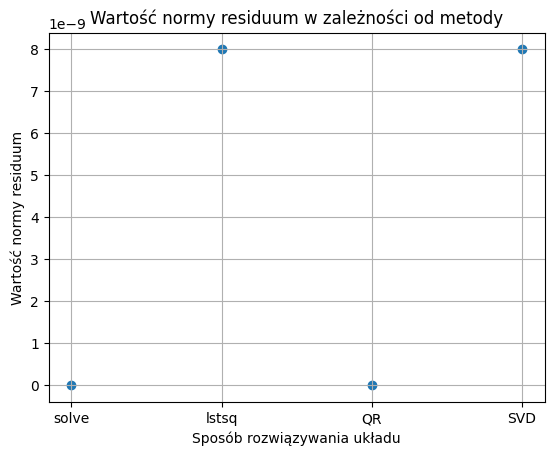

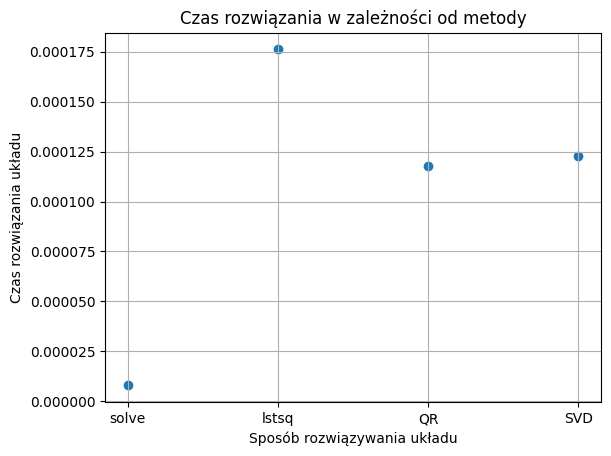

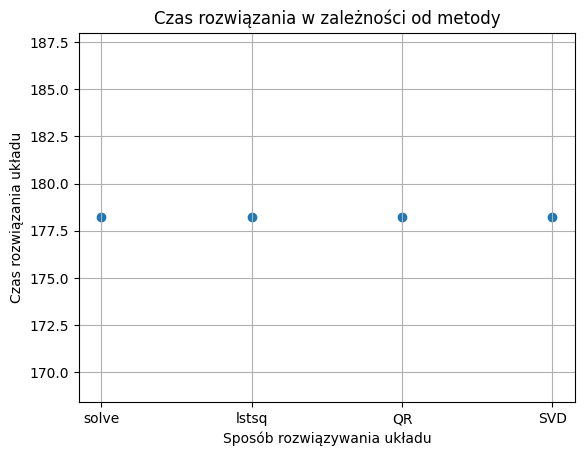

In [16]:
lst = ["solve", "lstsq", "QR", "SVD"]
plt.scatter(lst,residuum)
plt.grid()
plt.xlabel("Sposób rozwiązywania układu")
plt.ylabel("Wartość normy residuum")
plt.title("Wartość normy residuum w zależności od metody")
plt.show()

plt.scatter(lst,time)
plt.grid()
plt.xlabel("Sposób rozwiązywania układu")
plt.ylabel("Czas rozwiązania układu")
plt.title("Czas rozwiązania w zależności od metody")
plt.show()

plt.scatter(lst,memory)
plt.grid()
plt.xlabel("Sposób rozwiązywania układu")
plt.ylabel("Zużycie pamięci")
plt.title("Zużycie pamięci w zależności od metody")
plt.show()

***Zadanie 2***

Utwórz dwa wektory $x_1$ oraz $x_2$ opiujące dochód i wydatki pewnego gospodarstwa.

Dochody = [210, 270, 290, 310, 370, 400, 450, 480, 510, 520]

Wydatki = [140, 190, 250, 270, 290, 310, 340, 360, 420, 390]

Utwórz regresję liniową zależności wydatków od dochodów.

Jaki jest błąd uzyskanej prostej względem danych? Czy jest możliwość uzyskania lepszego wyniku?

W celu wyznaczenia współczynników wykorzystaj niniejszą informację https://en.wikipedia.org/wiki/Simple_linear_regression


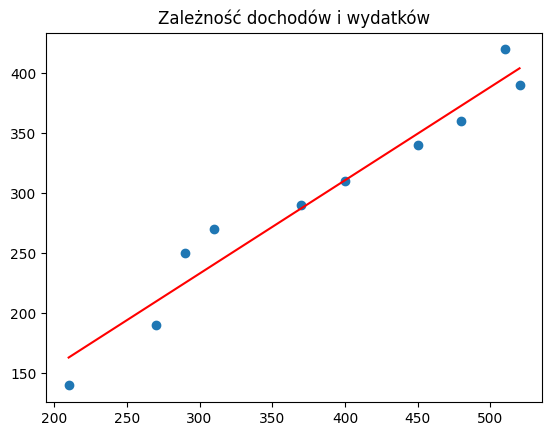

In [81]:
x1 = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])
x2 = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])

X = x1.reshape((len(x1), 1))
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(x2)
line = X.dot(b)
plt.scatter(x1,x2)
plt.plot(X,line,color='red')
plt.title("Zależność dochodów i wydatków")
plt.show()

***Zadanie 3***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

In [17]:
pred1=[min(x1), max(x1)]
pred2=[min(x2), max(x2)]

NameError: name 'x1' is not defined

3.1

In [20]:
x1 = np.random.normal(0,1,size=(100,1))
x2 = np.random.normal(0,1,size=(100,1))


3.2

In [31]:
e = np.random.normal(0,1,size=(100,1))
y = 2 + x1 - 0.5*x2 + e

3.3

In [32]:
vector = np.ones((100,1))
x_con_1 = np.concatenate((vector,x1),axis=1)
x_con_2 = np.concatenate((vector,x2),axis=1)
x_con_12 = np.concatenate((vector,x1,x2),axis=1)

3.4,3.5

y ~ a + x1

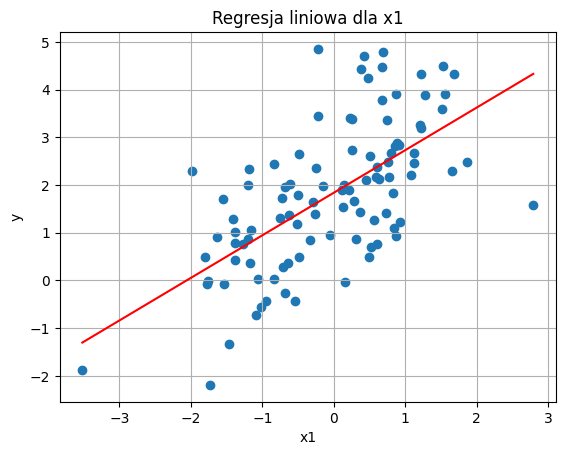

In [38]:
Q,R = np.linalg.qr(x_con_1)
A = sp.linalg.solve_triangular(R, Q.T @ y)
pred1=[min(x1), max(x1)]
y_result = A[0] + A[1] * pred1

plt.scatter(x1,y)
plt.plot(pred1,y_result,color='r')
plt.title("Regresja liniowa dla x1")
plt.xlabel('x1')
plt.ylabel('y')
plt.grid()
plt.show()

y ~ a + x2

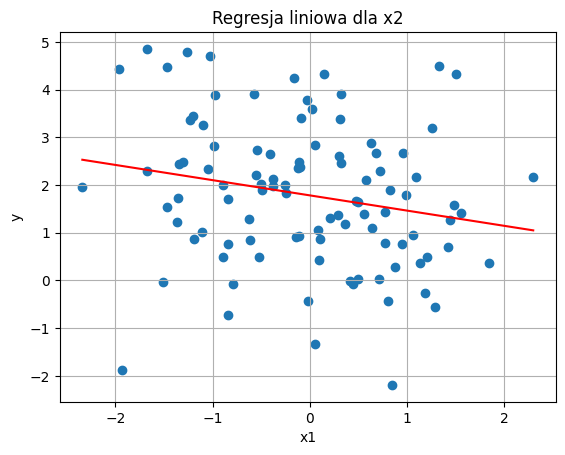

In [40]:
Q,R = np.linalg.qr(x_con_2)
A = sp.linalg.solve_triangular(R, Q.T @ y)
pred2=[min(x2), max(x2)]
y_result = A[0] + A[1] * pred2

plt.scatter(x2,y)
plt.plot(pred2,y_result,color='r')
plt.title("Regresja liniowa dla x2")
plt.xlabel('x1')
plt.ylabel('y')
plt.grid()
plt.show()

y ~ a + x1 + x2

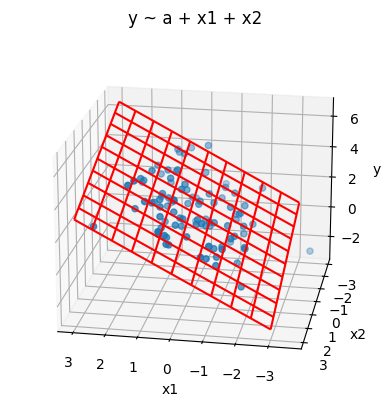

In [65]:
Q,R = np.linalg.qr(x_con_12)
A = sp.linalg.solve_triangular(R, Q.T @ y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = x1
Y = x2
Z = y
ax.scatter(X,Y,Z)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title("y ~ a + x1 + x2")

X, Y = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z = A[0] + A[1] * X + A[2] * Y
ax.plot_wireframe(X,Y,Z,color= 'r',rstride = 10, cstride = 10)
ax.view_init(20,100)

plt.show()

y ~ a + x2 + x2

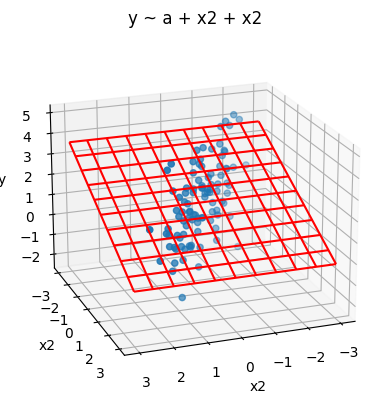

In [70]:
Q,R = np.linalg.qr(x_con_2)
A = sp.linalg.solve_triangular(R, Q.T @ y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = x2
Y = x2
Z = y
ax.scatter(X,Y,Z)
ax.set_xlabel('x2')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title("y ~ a + x2 + x2")

X, Y = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z = A[0] + A[1] * Y + A[1] * Y
ax.plot_wireframe(X,Y,Z,color= 'r',rstride = 10, cstride = 10)
ax.view_init(20,70)

plt.show()

WNIOSKI:
Na dzisiejszym laboratorium zapoznaliśmy się z metodami rozwiąywaniem liniowych układów równań które posiadają macierze prostokątne. W pierwszym zadaniu rozwiązywaliśmy układy za pomocą metod SVD, QR oraz za pomocą funkcji solve. Porównywaliśmy otrzynane wyniki i okazało się, że najlepesze wyniki otrzymuję się używając rozkładu QR oraz funkcji np.solve. Zadanie 2 i 3 polegało na dopasowaniu regresji liniowej.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)